# Exercise No. 9 - Temporal Data Analysis: Vector-to-Sequence & Sequence-to-Symbol Models

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.utils import to_categorical

In [2]:
# Generate Synthetic Temporal Healthcare Data
np.random.seed(42)
num_samples, time_steps, features = 1000, 10, 3
data = np.random.rand(num_samples, time_steps, features) * [100, 180, 120] + [40, 60, 40]

In [3]:
# Normalize and Prepare Datasets
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, features)).reshape(num_samples, time_steps, features)
# Vector-to-Seq
X_v2s = np.random.rand(num_samples, features)
y_v2s = data_scaled
# Sequence-to-Symbol
risk = np.mean(data_scaled, axis=(1, 2))
y_s2s = np.digitize(risk, bins=[0.4, 0.7])
y_s2s_cat = to_categorical(y_s2s, num_classes=3)
# Split
X_train_v2s, X_test_v2s, y_train_v2s, y_test_v2s = train_test_split(X_v2s, y_v2s, test_size=0.2)
X_train_s2s, X_test_s2s, y_train_s2s, y_test_s2s = train_test_split(data_scaled, y_s2s_cat, test_size=0.2)

In [4]:
# Vector-to-Sequence Model
model_v2s = Sequential([
    Dense(64, activation='relu', input_shape=(features,)),
    RepeatVector(time_steps),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(features))
])
model_v2s.compile(optimizer='adam', loss='mse')
history_v2s = model_v2s.fit(X_train_v2s, y_train_v2s, epochs=20, validation_data=(X_test_v2s, y_test_v2s), verbose=0)

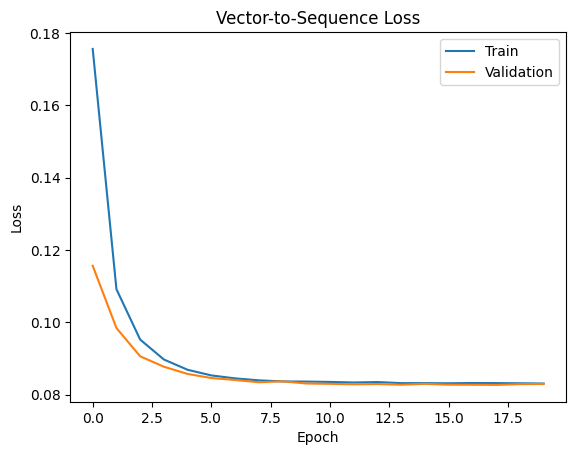

In [5]:
# Plot Vector-to-Sequence Loss
plt.plot(history_v2s.history['loss'], label='Train')
plt.plot(history_v2s.history['val_loss'], label='Validation')
plt.title('Vector-to-Sequence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Sequence-to-Symbol Model
model_s2s = Sequential([
    LSTM(64, input_shape=(time_steps, features)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_s2s.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_s2s = model_s2s.fit(X_train_s2s, y_train_s2s, epochs=20, validation_data=(X_test_s2s, y_test_s2s), verbose=0)

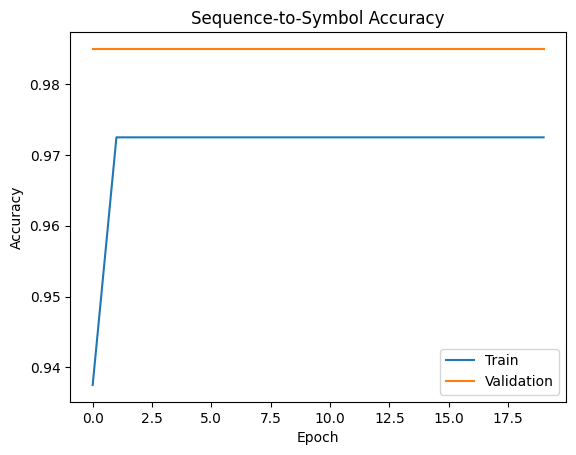

In [7]:
# Plot Sequence-to-Symbol Accuracy
plt.plot(history_s2s.history['accuracy'], label='Train')
plt.plot(history_s2s.history['val_accuracy'], label='Validation')
plt.title('Sequence-to-Symbol Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()